In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
wqr= pd.read_csv("C:\\Users\\dhima\\anaconda3\\5th Week\\winequality-red.csv")
wqr1=wqr.copy()
wqr1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.42
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.57
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.17
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.65
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.98
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.32
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.62
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.41


In [2]:
X1=wqr1["pH"].values.reshape(-1,1)
print(X1)
print('\n\n')
Y1=wqr1["quality"].values.reshape(-1,1)
print(Y1)
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,
                                train_size=0.70,random_state=42)

[[3.51]
 [3.2 ]
 [3.26]
 ...
 [3.42]
 [3.57]
 [3.39]]



[[5.42]
 [5.57]
 [5.17]
 ...
 [6.62]
 [5.41]
 [6.38]]


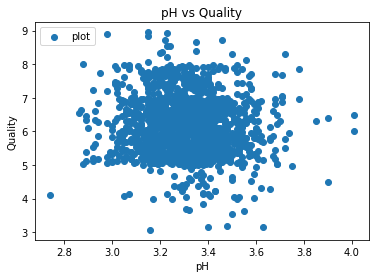

In [3]:
plt.scatter(wqr1["pH"], wqr1["quality"], label='plot')
plt.title('pH vs Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.legend(loc='upper left')
plt.show()

In [4]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X1_train,Y1_train)
predicted_data = reg.predict(X1)
predicted_train = reg.predict(X1_train)
predicted_test = reg.predict(X1_test)

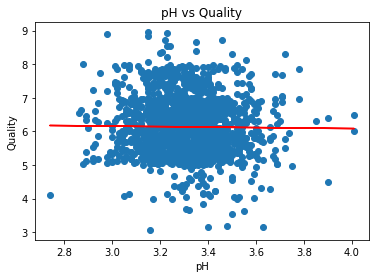

In [5]:
plt.scatter(wqr1["pH"],wqr1["quality"], label='plot')
plt.plot(wqr1["pH"],predicted_data,color='red')
plt.title('pH vs Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

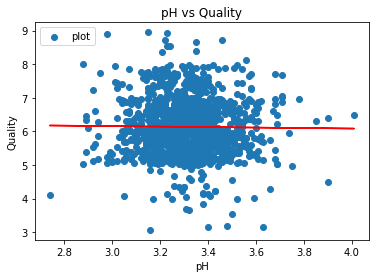

In [6]:
plt.scatter(X1_train, Y1_train, label='plot')
plt.plot(X1_train,predicted_train,color='red')
plt.title('pH vs Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.legend(loc='upper left')
plt.show()

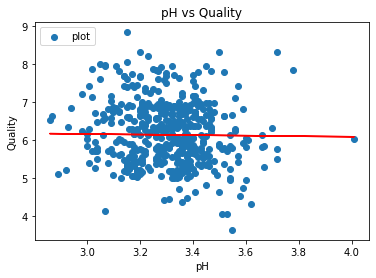

In [7]:
plt.scatter(X1_test, Y1_test, label='plot')
plt.plot(X1_test,predicted_test,color='red')
plt.title('pH vs Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.legend(loc='upper left')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
import math
MSE_1 = mean_squared_error(Y1_train, predicted_train)
MSE_2 = mean_squared_error(Y1_test, predicted_test)
RMSE_1 = math.sqrt(MSE_1)
RMSE_2 = math.sqrt(MSE_2)
print("Root Mean Square Error of train:")
print(RMSE_1)
print("Root Mean Square Error of test:")
print(RMSE_2)

Root Mean Square Error of train:
0.8624300774972703
Root Mean Square Error of test:
0.8434022740015744


0.8560545361945039
0.8550342500100593
0.8546933698359007
0.85463870172786


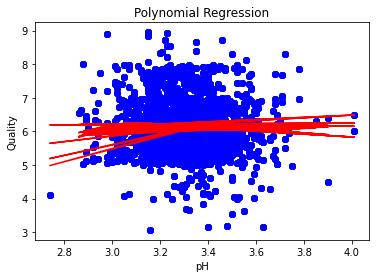

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degree=[2,3,4,5]

for i,k in enumerate(degree):               #by applying loop the graph is overlapping
    poly_i = PolynomialFeatures(degree=k)
    X1_poly_i = poly_i.fit_transform(X1)

    poly_i.fit(X1_poly_i, Y1)
    lin2 = LinearRegression()
    lin2.fit(X1_poly_i, Y1)
    y_pred_i=lin2.predict(poly_i.fit_transform(X1))
    plt.scatter(X1, Y1, color = 'blue')

    p1=plt.plot(X1, lin2.predict(poly_i.fit_transform(X1)), color = 'red')
    plt.title('Polynomial Regression')
    plt.xlabel('pH')
    plt.ylabel('Quality')
    R1=np.sqrt(mean_squared_error(Y1,y_pred_i))
    print(R1)

0.8560545361945039


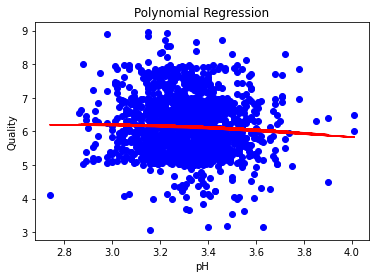

In [10]:
poly_1 = PolynomialFeatures(degree = 2)
X1_poly_1 = poly_1.fit_transform(X1)
  
poly_1.fit(X1_poly_1, Y1)
lin2 = LinearRegression()
lin2.fit(X1_poly_1, Y1)
y_pred_1=lin2.predict(poly_1.fit_transform(X1))
plt.scatter(X1, Y1, color = 'blue')
  
plt.plot(X1, lin2.predict(poly_1.fit_transform(X1)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('pH')
plt.ylabel('Quality')
R1=np.sqrt(mean_squared_error(Y1,y_pred_1))
print(R1)

0.8550342500100593


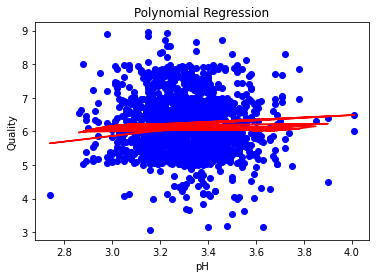

In [11]:
poly_2 = PolynomialFeatures(degree = 3)
X1_poly_2 = poly_2.fit_transform(X1)
  
poly_2.fit(X1_poly_2, Y1)
lin2 = LinearRegression()
lin2.fit(X1_poly_2, Y1)
y_pred_2=lin2.predict(poly_2.fit_transform(X1))
plt.scatter(X1, Y1, color = 'blue')
  
plt.plot(X1, lin2.predict(poly_2.fit_transform(X1)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('pH')
plt.ylabel('Quality')
R1=np.sqrt(mean_squared_error(Y1,y_pred_2))
print(R1)

In [12]:
X2=wqr1.iloc[0:,0:11]
Y2=wqr1["quality"].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,
                                train_size=0.70,random_state=42)
print(X2_train)
print(Y2_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
925             8.6             0.220         0.36             1.9      0.064   
363            12.5             0.460         0.63             2.0      0.071   
906             7.2             0.540         0.27             2.6      0.084   
426             6.4             0.670         0.08             2.1      0.045   
1251            7.5             0.580         0.14             2.2      0.077   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X2_train,Y2_train)
predicted2_data = reg.predict(X2)
predicted2_train = reg.predict(X2_train)
predicted2_test = reg.predict(X2_test)

In [14]:
from sklearn.metrics import mean_squared_error
import math
MSE_3 = mean_squared_error(Y2_train, predicted_train)
MSE_4 = mean_squared_error(Y2_test, predicted_test)
RMSE_3 = math.sqrt(MSE_1)
RMSE_4 = math.sqrt(MSE_2)
print("Root Mean Square Error of train:")
print(RMSE_3)
print("Root Mean Square Error of test:")
print(RMSE_4)

Root Mean Square Error of train:
0.8624300774972703
Root Mean Square Error of test:
0.8434022740015744


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree=[1,2,3]

for i,k in enumerate(degree): 
    
    poly_i = PolynomialFeatures(degree = k)
    X2_poly_i = poly_i.fit_transform(X2)

    poly_i.fit(X2_poly_i, Y2)
    lin2 = LinearRegression()
    lin2.fit(X2_poly_i, Y2)
    y_pred_i=lin2.predict(poly_i.fit_transform(X2))

    R1=np.sqrt(mean_squared_error(Y2,y_pred_i))
    print(R1)

0.7132621927997982
0.6725489265884125
0.5592677255163118


In [16]:
from scipy.stats import pearsonr
list1 = wqr1['quality'] 
list2 = wqr1['volatile acidity']
list3= wqr1['citric acid']
list4= wqr1['residual sugar']
list5= wqr1['chlorides']
list6= wqr1['free sulfur dioxide']
list7= wqr1['total sulfur dioxide']
list8= wqr1['density']
list9= wqr1['pH']
list10= wqr1['sulphates']
list11= wqr1['alcohol']
list12= wqr1['fixed acidity']
corr1= pearsonr(list1, list2)[0] 
corr2= pearsonr(list1, list3)[0] 
corr3= pearsonr(list1, list4)[0] 
corr4= pearsonr(list1, list5)[0] 
corr5= pearsonr(list1, list6)[0] 
corr6= pearsonr(list1, list7)[0] 
corr7= pearsonr(list1, list8)[0] 
corr8= pearsonr(list1, list9)[0] 
corr9= pearsonr(list1, list10)[0] 
corr10= pearsonr(list1, list11)[0] 
corr11= pearsonr(list1, list12)[0] 
print('Pearsons correlation1: ' , corr1)
print('Pearsons correlation2:' , corr2)
print('Pearsons correlation3: ' , corr3)
print('Pearsons correlation4: ' , corr4)
print('Pearsons correlation5:' ,corr5)
print('Pearsons correlation6: ' , corr6)
print('Pearsons correlation7: ' , corr7)
print('Pearsons correlation8: ' , corr8)
print('Pearsons correlation9:' , corr9)
print('Pearsons correlation10: ' , corr10)
print('Pearsons correlation11: ' , corr11)

Pearsons correlation1:  -0.3699960846637292
Pearsons correlation2: 0.20858611118689963
Pearsons correlation3:  0.005607037322216234
Pearsons correlation4:  -0.12326479526612572
Pearsons correlation5: -0.04459520747497195
Pearsons correlation6:  -0.1758756051517842
Pearsons correlation7:  -0.1681542598782257
Pearsons correlation8:  -0.046572461559001896
Pearsons correlation9: 0.2270225766484153
Pearsons correlation10:  0.4346884851091922
Pearsons correlation11:  0.1048559183708356


In [17]:
X3=wqr1[["volatile acidity","alcohol"]]
Y3=wqr1["quality"].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,
                                train_size=0.70,random_state=42)


In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X3,Y3)
predicted_data = reg.predict(X3)
predicted_train = reg.predict(X3_train)
predicted_test = reg.predict(X3_test)

In [19]:
from sklearn.metrics import mean_squared_error
import math
MSE_5 = mean_squared_error(Y3_train, predicted_train)
MSE_6 = mean_squared_error(Y3_test, predicted_test)
RMSE_5 = math.sqrt(MSE_5)
RMSE_6 = math.sqrt(MSE_6)
print("Root Mean Square Error of train:")
print(RMSE_5)
print("Root Mean Square Error of test:")
print(RMSE_6)

Root Mean Square Error of train:
0.733908513149113
Root Mean Square Error of test:
0.7252783083992618


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X3)
  
poly.fit(X_poly, Y3)
lin2 = LinearRegression()
lin2.fit(X_poly, Y3)
y_predict=lin2.predict(poly.fit_transform(X3))

MSE_7 = mean_squared_error(Y3, y_predict)
RMSE_7 = math.sqrt(MSE_7)
print("Root Mean Square Error of train:")
print(RMSE_7)

Root Mean Square Error of train:
0.7292967690739075


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X3)
  
poly.fit(X_poly, Y3)
lin2 = LinearRegression()
lin2.fit(X_poly, Y3)
y_predict=lin2.predict(poly.fit_transform(X3))

MSE_8 = mean_squared_error(Y3, y_predict)
RMSE_8 = math.sqrt(MSE_8)
print("Root Mean Square Error of train:")
print(RMSE_8)

Root Mean Square Error of train:
0.7244127387740402


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X3)
  
poly.fit(X_poly, Y3)
lin2 = LinearRegression()
lin2.fit(X_poly, Y3)
y_predict=lin2.predict(poly.fit_transform(X3))

MSE_9 = mean_squared_error(Y3, y_predict)
RMSE_9 = math.sqrt(MSE_9)
print("Root Mean Square Error of train:")
print(RMSE_9)

Root Mean Square Error of train:
0.7217647266112797


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X3)
  
poly.fit(X_poly, Y3)
lin2 = LinearRegression()
lin2.fit(X_poly, Y3)
y_predict=lin2.predict(poly.fit_transform(X3))

MSE_10 = mean_squared_error(Y3, y_predict)
RMSE_10 = math.sqrt(MSE_10)
print("Root Mean Square Error of train:")
print(RMSE_10)

Root Mean Square Error of train:
0.7202651050598432
